In [ ]:
# ================================================================
# CELDA 0 — CONFIGURACIÓN INICIAL + SUBIDA DE ARCHIVOS
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
from google.colab import files

plt.rcParams['figure.figsize'] = (15,4)

print("Sube el archivo Excel (enero-septiembre EAPSA)...")
uploaded = files.upload()

RUTAS_EXCEL = list(uploaded.keys())
print("\nArchivos cargados:")
for r in RUTAS_EXCEL:
    print("   ✔", r)

# ================================================================
# PARÁMETROS OFICIALES EAPSA (según memoria de cálculo)
# ================================================================
Q_MEDIA = 216.0            # m³/h promedio (60 L/s)
Q_MAX_REAL = 475.2         # m³/h máximo EN EL ECUALIZADOR (memoria)
UMBRAL_MAX = Q_MAX_REAL    # Datos mayores a esto NO SON POSIBLES

print(f"\nParámetros cargados:")
print(f"   Caudal medio de diseño   : {Q_MEDIA} m³/h")
print(f"   Caudal máximo real planta : {Q_MAX_REAL} m³/h")
print(f"   Umbral máximo permitido   : {UMBRAL_MAX} m³/h")

Sube el archivo Excel (enero-septiembre EAPSA)...


Saving EAPSA Caudal entrada ene-sep.xlsx to EAPSA Caudal entrada ene-sep (2).xlsx

Archivos cargados:
   ✔ EAPSA Caudal entrada ene-sep (2).xlsx

Parámetros cargados:
   Caudal medio de diseño   : 216.0 m³/h
   Caudal máximo real planta : 475.2 m³/h
   Umbral máximo permitido   : 475.2 m³/h


Filas cargadas: 39847


,datetime,mes,archivo,Q_in
0,2025-01-01 00:05:25,Enero,EAPSA Caudal entrada ene-sep (2).xlsx,176.508
1,2025-01-01 00:15:25,Enero,EAPSA Caudal entrada ene-sep (2).xlsx,178.884
2,2025-01-01 00:25:25,Enero,EAPSA Caudal entrada ene-sep (2).xlsx,169.776
3,2025-01-01 00:35:25,Enero,EAPSA Caudal entrada ene-sep (2).xlsx,151.884
4,2025-01-01 00:45:25,Enero,EAPSA Caudal entrada ene-sep (2).xlsx,152.892



===== IMPOSIBLES POR MAGNITUD =====
Total: 355


,datetime,mes,archivo,Q_in
11827,2025-03-21 03:34:28,Marzo,EAPSA Caudal entrada ene-sep (2).xlsx,-20.592
11828,2025-03-21 03:44:28,Marzo,EAPSA Caudal entrada ene-sep (2).xlsx,-2.016
11983,2025-03-22 05:34:28,Marzo,EAPSA Caudal entrada ene-sep (2).xlsx,-61.776
11985,2025-03-22 05:54:28,Marzo,EAPSA Caudal entrada ene-sep (2).xlsx,-27.324
11997,2025-03-22 07:54:28,Marzo,EAPSA Caudal entrada ene-sep (2).xlsx,-6.084



===== DUPLICADOS REALES =====
Total duplicados: 1160

===== SALTOS IMPOSIBLES DETECTADOS =====
Total: 81


,datetime,Q_in,mes,archivo,delta_Q
4601,2025-02-01 23:05:25,88.776,Febrero,EAPSA Caudal entrada ene-sep (2).xlsx,-132.624
5121,2025-02-05 13:45:25,270.684,Febrero,EAPSA Caudal entrada ene-sep (2).xlsx,126.900
5548,2025-02-08 12:55:25,131.616,Febrero,EAPSA Caudal entrada ene-sep (2).xlsx,-136.692
6732,2025-02-16 18:15:25,101.916,Febrero,EAPSA Caudal entrada ene-sep (2).xlsx,-133.992
6778,2025-02-17 01:55:25,18.216,Febrero,EAPSA Caudal entrada ene-sep (2).xlsx,-132.300



===== IMPOSIBLES POST-ALINEACIÓN =====
Total: 0


,Q_in
datetime,


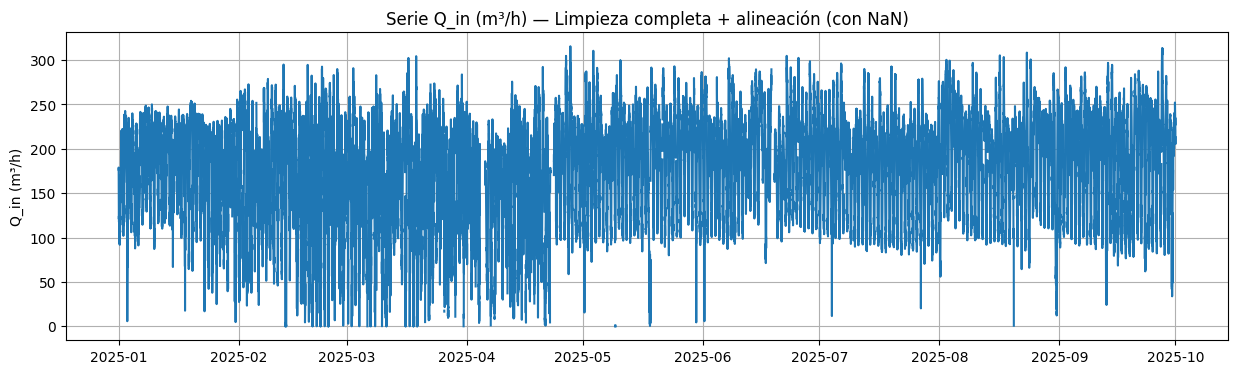


=========== TABLA FINAL POR MES ==========


,Mes,Datos ideales,Datos crudos,Imposibles magnitud,Imposibles salto,Imposibles post-align,Faltantes,Completitud (%),Q_min,Q_max,Q_prom,p5,p95
0,Enero,4464,4744,0,0,0,58,98.70,4.716,255.492,179.355530,96.8760,237.6000
1,Febrero,4032,4187,0,13,0,19,99.53,0.000,294.984,161.040828,46.4400,254.1240
2,Marzo,4464,4452,24,37,0,106,97.63,0.000,304.416,157.563318,46.8918,249.4080
3,Abril,4320,4320,181,17,0,397,90.81,0.684,315.576,158.044854,54.0324,244.6920
4,Mayo,4464,4463,13,4,0,23,99.48,0.000,310.500,190.191218,104.9760,269.3160
5,Junio,4320,4464,135,2,0,158,96.34,5.724,304.776,192.444288,109.3680,272.0160
6,Julio,4464,4463,1,7,0,10,99.78,11.556,296.244,181.612128,97.2000,264.6846
7,Agosto,4464,4435,1,1,0,35,99.22,0.612,308.448,192.050157,101.2320,270.9360
8,Septiembre,4320,4319,0,0,0,2,99.95,24.048,313.452,191.578635,100.2528,267.8040


In [ ]:
# ================================================================
# CELDA 1 — PREPROCESAMIENTO HIDRÁULICO DEFINITIVO (NO ELIMINA NaN)
# ================================================================

import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt


# --------------------------------------------------------------
# 1. FUNCION PARA CARGAR TODAS LAS HOJAS ENERO–SEPTIEMBRE
# --------------------------------------------------------------

def cargar_hojas_eapsa(rutas_excel):

    meses_validos = [
        "enero","febrero","marzo","abril","mayo",
        "junio","julio","agosto","septiembre"
    ]

    dfs = []

    for archivo in rutas_excel:
        xl = pd.ExcelFile(archivo)

        for hoja in xl.sheet_names:

            if hoja.lower() in meses_validos:

                df = pd.read_excel(archivo, sheet_name=hoja)
                df.columns = [c.lower().strip() for c in df.columns]

                # detectar columnas
                col_f = next(c for c in df.columns if "fecha" in c)
                col_h = next(c for c in df.columns if "hora" in c)
                col_q = next(c for c in df.columns if c.startswith("q"))

                # datetime completo
                df["datetime"] = (
                    pd.to_datetime(df[col_f], errors="coerce") +
                    pd.to_timedelta(df[col_h].astype(str), errors="coerce")
                )

                df = df.dropna(subset=["datetime"]).copy()

                # Conversión L/s → m³/h (según memoria)
                df[col_q] = df[col_q] * 3.6

                df["mes"] = hoja.capitalize()
                df["archivo"] = archivo

                df = df[["datetime","mes","archivo",col_q]].rename(columns={col_q:"Q_in"})
                dfs.append(df)

    return pd.concat(dfs, ignore_index=True).sort_values("datetime").reset_index(drop=True)



# ================================================================
# 2. LEER ARCHIVOS CRUDOS
# ================================================================
df_raw = cargar_hojas_eapsa(RUTAS_EXCEL)

print("Filas cargadas:", len(df_raw))
display(df_raw.head())

df_raw = df_raw.dropna(subset=["datetime"]).copy()


# ================================================================
# 3. FILTRO DE IMPOSIBLES POR MAGNITUD (ANTES DE TODO)
# ================================================================
UMBRAL_MAX = 475.2  # según memoria de cálculo

cond_invalid = (
    (df_raw["Q_in"] < 0) |
    (df_raw["Q_in"] > UMBRAL_MAX)
    # (NO eliminamos NaN aquí)
)

df_invalidos_mag = df_raw[cond_invalid]
df_valid_raw = df_raw[~cond_invalid].copy()

print("\n===== IMPOSIBLES POR MAGNITUD =====")
print("Total:", len(df_invalidos_mag))
display(df_invalidos_mag.head())


# ================================================================
# 4. DUPLICADOS REALES DE TIEMPO
# ================================================================
dup = df_valid_raw[df_valid_raw.duplicated("datetime", keep=False)]
print("\n===== DUPLICADOS REALES =====")
print("Total duplicados:", len(dup))

if len(dup) > 0:
    df_valid_raw = (
        df_valid_raw.groupby("datetime", as_index=False)
                    .agg({"Q_in":"mean","mes":"first","archivo":"first"})
    )

df_valid_raw = df_valid_raw.sort_values("datetime").reset_index(drop=True)


# ================================================================
# 5. SALTOS HIDRÁULICAMENTE IMPOSIBLES (GRADIENTE)
# ================================================================
df_valid_raw["delta_Q"] = df_valid_raw["Q_in"].diff()

SALTO_MAX = 120  # m³/h por 10 min (realista)
cond_salto = df_valid_raw["delta_Q"].abs() > SALTO_MAX

df_invalidos_saltos = df_valid_raw[cond_salto]

print("\n===== SALTOS IMPOSIBLES DETECTADOS =====")
print("Total:", len(df_invalidos_saltos))
display(df_invalidos_saltos.head())

df_valid_raw = df_valid_raw[~cond_salto].copy()
df_valid_raw = df_valid_raw.drop(columns=["delta_Q"])


# ================================================================
# 6. ALINEACIÓN EXACTA A 10 MINUTOS (NO ELIMINA NaN)
# ================================================================
df_valid_raw["datetime_10"] = df_valid_raw["datetime"].dt.floor("10min")

df_valid_10 = (
    df_valid_raw.groupby("datetime_10")["Q_in"]
    .mean()
    .to_frame()
)

inicio = df_valid_10.index.min()
fin = df_valid_10.index.max()

df_valid_10 = df_valid_10.reindex(
    pd.date_range(start=inicio, end=fin, freq="10min")
)

df_valid_10.index.name = "datetime"
df_clean_aligned = df_valid_10.copy()


# ================================================================
# 7. FILTRO FINAL POST-ALINEACIÓN (NO ELIMINA NaN)
# ================================================================
cond_final_imposible = (
    (df_clean_aligned["Q_in"] < 0) |
    (df_clean_aligned["Q_in"] > UMBRAL_MAX)
    # OJO: NO filtramos NaN → se rellenan en Celda 2
)

df_final_imposibles = df_clean_aligned[cond_final_imposible]

print("\n===== IMPOSIBLES POST-ALINEACIÓN =====")
print("Total:", len(df_final_imposibles))
display(df_final_imposibles.head())

df_clean_aligned = df_clean_aligned[~cond_final_imposible].copy()


# ================================================================
# 8. GRAFICO DE Q_in LIMPIA
# ================================================================
global fig_q_in_limpia # Declare global variable for figure
fig_q_in_limpia = plt.figure(figsize=(15,4))
plt.plot(df_clean_aligned.index, df_clean_aligned["Q_in"])
plt.title("Serie Q_in (m³/h) — Limpieza completa + alineación (con NaN)")
plt.ylabel("Q_in (m³/h)")
plt.grid()
plt.show() # Display the plot in the notebook


# ================================================================
# 9. TABLA FINAL POR MES
# ================================================================
df_raw["mes_num"] = df_raw["datetime"].dt.month
df_clean_aligned["mes_num"] = df_clean_aligned.index.month

tabla = []
meses_nombres = {
    1:"Enero",2:"Febrero",3:"Marzo",4:"Abril",
    5:"Mayo",6:"Junio",7:"Julio",8:"Agosto",9:"Septiembre"
}

for m in sorted(df_raw["mes_num"].unique()):

    nombre = meses_nombres[m]
    dias = calendar.monthrange(2025, m)[1]
    ideales = dias * 24 * 6

    df_crudo_m = df_raw[df_raw["mes_num"] == m]
    df_clean_m = df_clean_aligned[df_clean_aligned["mes_num"] == m]

    ausentes = df_clean_m["Q_in"].isna().sum()

    imp_mag = df_invalidos_mag[df_invalidos_mag["datetime"].dt.month == m].shape[0]
    imp_salto = df_invalidos_saltos[df_invalidos_saltos["datetime"].dt.month == m].shape[0]
    imp_final = df_final_imposibles[df_final_imposibles.index.month == m].shape[0]

    if df_clean_m["Q_in"].count() > 0:
        qmin = df_clean_m["Q_in"].min()
        qmax = df_clean_m["Q_in"].max()
        qprom = df_clean_m["Q_in"].mean()
        q5 = df_clean_m["Q_in"].quantile(0.05)
        q95 = df_clean_m["Q_in"].quantile(0.95)
    else:
        qmin=qmax=qprom=q5=q95=np.nan

    complet = round(100 * (1 - ausentes/ideales), 2)

    tabla.append([
        nombre, ideales, len(df_crudo_m),
        imp_mag, imp_salto, imp_final,
        ausentes, complet,
        qmin, qmax, qprom, q5, q95
    ])

tabla_df = pd.DataFrame(tabla, columns=[
    "Mes","Datos ideales","Datos crudos",
    "Imposibles magnitud","Imposibles salto","Imposibles post-align",
    "Faltantes","Completitud (%)",
    "Q_min","Q_max","Q_prom","p5","p95"
])

print("\n=========== TABLA FINAL POR MES ==========")
display(tabla_df)

# EXPORTA PARA CELDA 2
df_valid_10 = df_clean_aligned.copy()

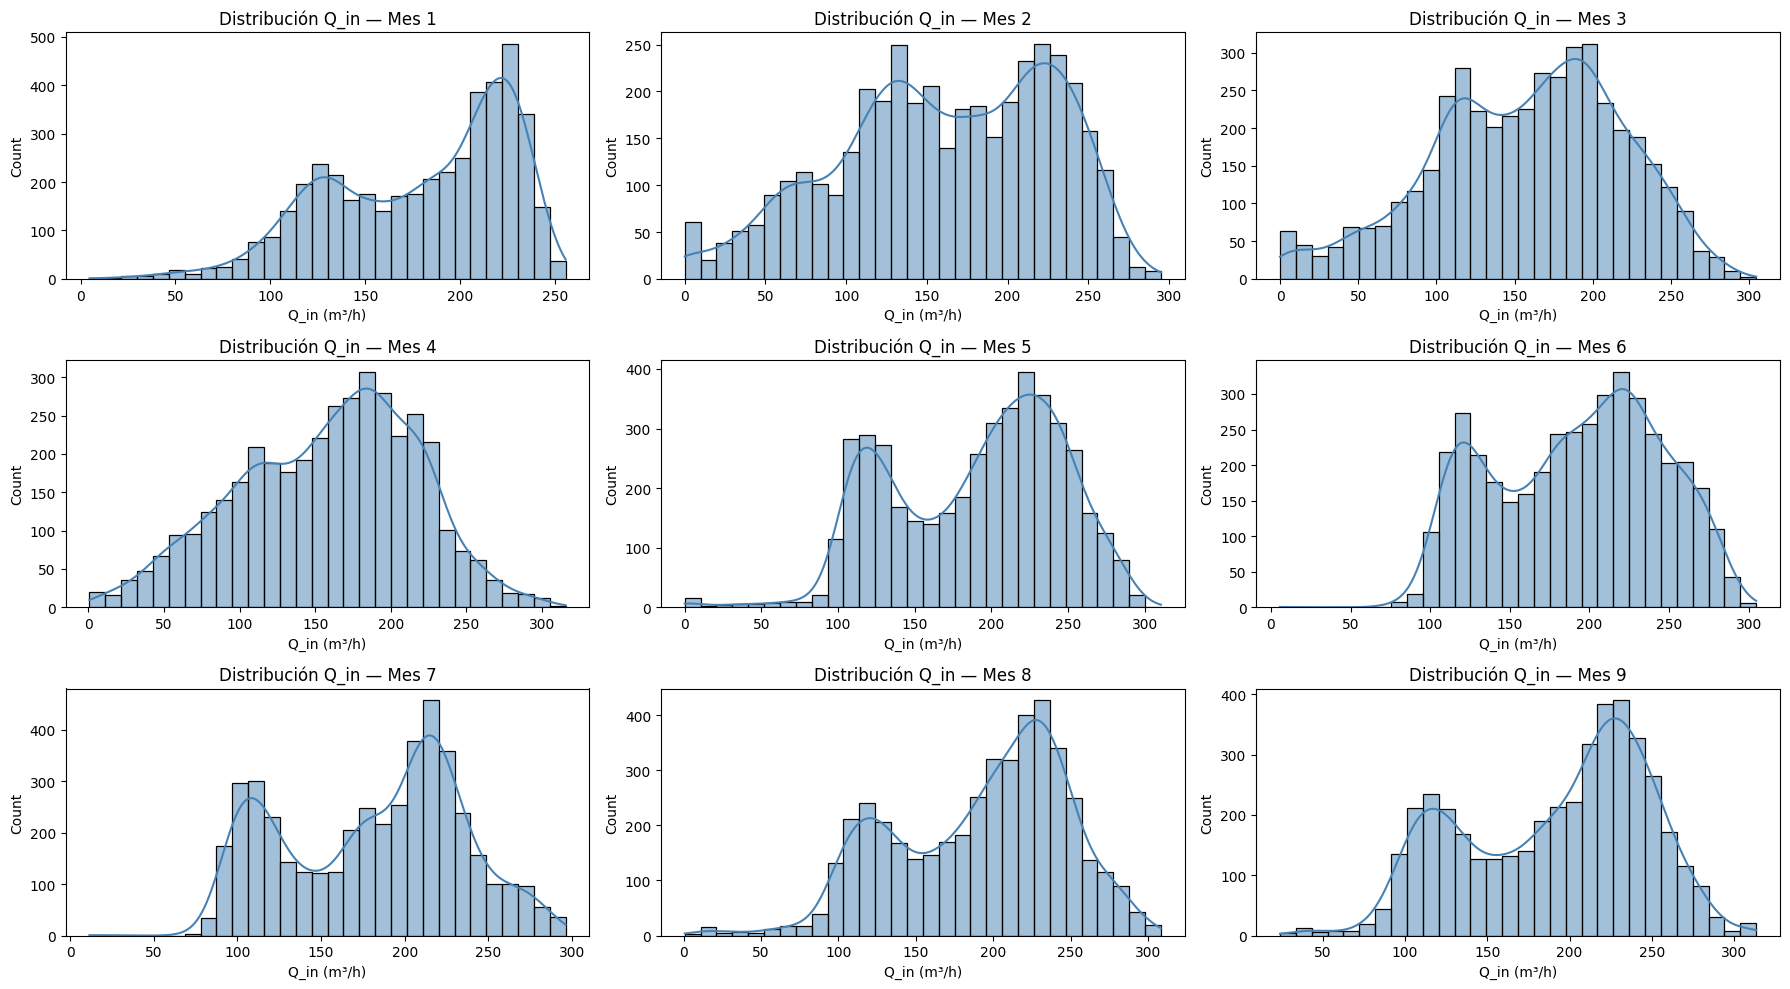

In [ ]:
# ================================================================
# HISTOGRAMAS + KDE DE Q_in POR MES
# ================================================================
import seaborn as sns

df_plot = df_clean_aligned.copy()
df_plot["mes"] = df_plot.index.month

global fig_hist_q_in_mes # Declare global variable for figure
fig_hist_q_in_mes = plt.figure(figsize=(18,10))
for m in range(1,10):
    plt.subplot(3,3,m)
    sns.histplot(
        df_plot[df_plot["mes"]==m]["Q_in"],
        kde=True, bins=30, color="steelblue"
    )
    plt.title(f"Distribución Q_in — Mes {m}")
    plt.xlabel("Q_in (m³/h)")
plt.tight_layout()
plt.show() # Display the plot in the notebook


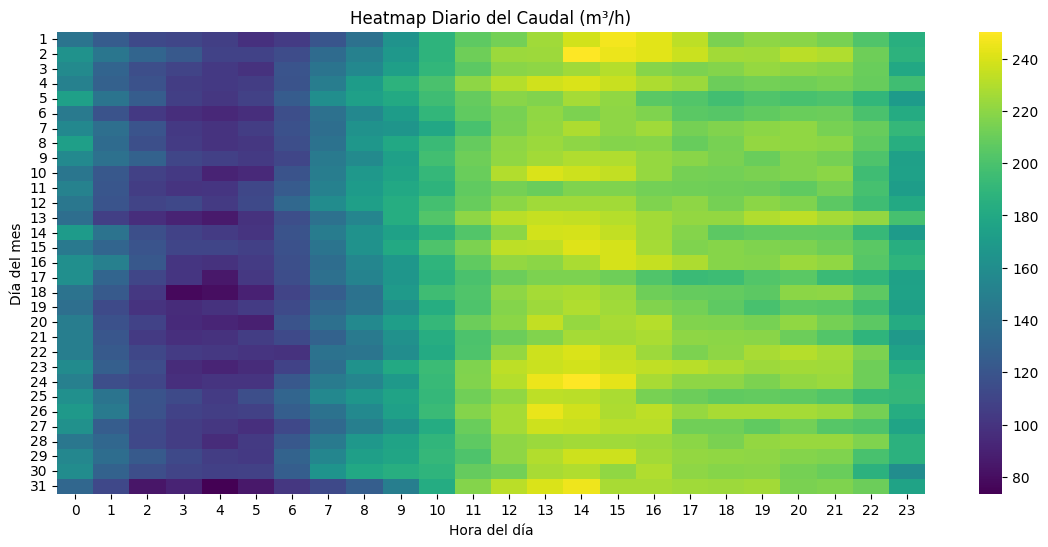

In [ ]:
# ================================================================
# HEATMAP DIARIO (DÍA vs HORA)
# ================================================================
df_hm = df_clean_aligned.copy()
df_hm["dia"] = df_hm.index.day
df_hm["hora"] = df_hm.index.hour

pivot = df_hm.pivot_table(
    values="Q_in", index="dia", columns="hora", aggfunc="mean"
)

global fig_heatmap_diario # Declare global variable for figure
fig_heatmap_diario = plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="viridis")
plt.title("Heatmap Diario del Caudal (m³/h)")
plt.xlabel("Hora del día")
plt.ylabel("Día del mes")
plt.show() # Display the plot in the notebook


/tmp/ipython-input-708518669.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weekday", y="Q_in", data=df_w, palette="coolwarm")


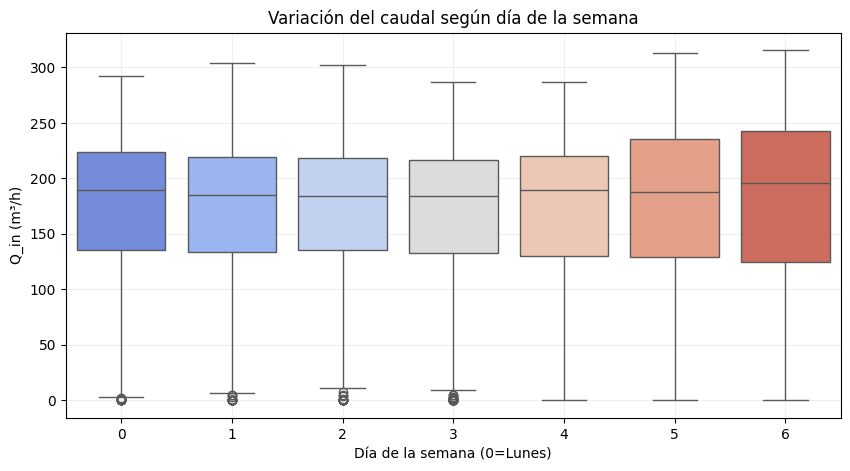

In [ ]:
# ================================================================
# CAUDAL SEGÚN DÍA DE LA SEMANA
# ================================================================
df_w = df_clean_aligned.copy()
df_w["weekday"] = df_w.index.weekday

global fig_boxplot_weekday # Declare global variable for figure
fig_boxplot_weekday = plt.figure(figsize=(10,5))
sns.boxplot(x="weekday", y="Q_in", data=df_w, palette="coolwarm")
plt.title("Variación del caudal según día de la semana")
plt.xlabel("Día de la semana (0=Lunes)")
plt.ylabel("Q_in (m³/h)")
plt.grid(alpha=0.2)
plt.show() # Display the plot in the notebook


In [ ]:
# ================================================================
# ANALISIS DE HUECOS (GAPS) EN df_valid_10
# ================================================================

df_gap = df_valid_10.copy()

# Identificar puntos faltantes
df_gap["is_nan"] = df_gap["Q_in"].isna()

# Detectar transiciones: inicio y fin de cada hueco
df_gap["block"] = (df_gap["is_nan"] != df_gap["is_nan"].shift()).cumsum()

# Agrupar por bloques
huecos = df_gap[df_gap["is_nan"]].groupby("block").agg(
    inicio=("is_nan", lambda x: x.index.min()),
    fin=("is_nan", lambda x: x.index.max()),
    n_puntos=("is_nan", "size")
)

# Convertir puntos (10 min cada uno) a duración real
huecos["duracion_min"] = huecos["n_puntos"] * 10
huecos["duracion_horas"] = huecos["duracion_min"] / 60
huecos["duracion_dias"] = huecos["duracion_horas"] / 24

print("===== HUECOS DETECTADOS =====")
display(huecos)

print("\n===== ESTADÍSTICAS GLOBALES =====")
print("Total huecos:", len(huecos))
print("Hueco más largo (min):", huecos["duracion_min"].max())
print("Hueco más largo (horas):", huecos["duracion_horas"].max())
print("Hueco más largo (días):", huecos["duracion_dias"].max())

print("\nHuecos mayores a 3 horas:")
display(huecos[huecos["duracion_horas"] > 3].head())

print("\nHuecos mayores a 12 horas:")
display(huecos[huecos["duracion_horas"] > 12].head())

print("\nHuecos mayores a 24 horas:")
display(huecos[huecos["duracion_dias"] > 1])

===== HUECOS DETECTADOS =====


,inicio,fin,n_puntos,duracion_min,duracion_horas,duracion_dias
block,,,,,,
2,2025-01-12 23:40:00,2025-01-12 23:40:00,1,10,0.166667,0.006944
4,2025-01-23 10:30:00,2025-01-23 10:30:00,1,10,0.166667,0.006944
6,2025-01-28 03:00:00,2025-01-28 03:00:00,1,10,0.166667,0.006944
8,2025-01-28 06:00:00,2025-01-28 06:00:00,1,10,0.166667,0.006944
10,2025-01-29 23:40:00,2025-01-30 08:00:00,51,510,8.500000,0.354167
...,...,...,...,...,...,...
348,2025-08-13 10:30:00,2025-08-13 10:30:00,1,10,0.166667,0.006944
350,2025-08-13 11:30:00,2025-08-13 11:30:00,1,10,0.166667,0.006944
352,2025-08-20 06:00:00,2025-08-20 06:00:00,1,10,0.166667,0.006944



===== ESTADÍSTICAS GLOBALES =====
Total huecos: 178
Hueco más largo (min): 1920
Hueco más largo (horas): 32.0
Hueco más largo (días): 1.3333333333333333

Huecos mayores a 3 horas:


,inicio,fin,n_puntos,duracion_min,duracion_horas,duracion_dias
block,,,,,,
10,2025-01-29 23:40:00,2025-01-30 08:00:00,51,510,8.500000,0.354167
184,2025-04-04 08:10:00,2025-04-05 16:00:00,192,1920,32.000000,1.333333
262,2025-04-22 12:20:00,2025-04-23 10:10:00,132,1320,22.000000,0.916667
312,2025-06-12 10:00:00,2025-06-12 13:10:00,20,200,3.333333,0.138889
318,2025-06-18 15:10:00,2025-06-19 10:00:00,114,1140,19.000000,0.791667



Huecos mayores a 12 horas:


,inicio,fin,n_puntos,duracion_min,duracion_horas,duracion_dias
block,,,,,,
184,2025-04-04 08:10:00,2025-04-05 16:00:00,192,1920,32.0,1.333333
262,2025-04-22 12:20:00,2025-04-23 10:10:00,132,1320,22.0,0.916667
318,2025-06-18 15:10:00,2025-06-19 10:00:00,114,1140,19.0,0.791667



Huecos mayores a 24 horas:


,inicio,fin,n_puntos,duracion_min,duracion_horas,duracion_dias
block,,,,,,
184,2025-04-04 08:10:00,2025-04-05 16:00:00,192,1920,32.0,1.333333


In [ ]:
# ================================================================
# TABLAS DE DÍAS CRÍTICOS
# ================================================================
df_day = df_clean_aligned.copy()
df_day["dia"] = df_day.index.date

tabla_dias = df_day.groupby("dia")["Q_in"].agg(
    ["min","max","mean","std"]
).rename(columns={
    "min":"Q_min_diario",
    "max":"Q_max_diario",
    "mean":"Q_prom_diario",
    "std":"Varianza_diaria"
})

print("=== DÍAS CON MAYOR Q_max ===")
display(tabla_dias.sort_values("Q_max_diario", ascending=False).head(10))

print("=== DÍAS CON MAYOR VARIANZA ===")
display(tabla_dias.sort_values("Varianza_diaria", ascending=False).head(10))

print("=== DÍAS CON Q_min CERCANO A CERO ===")
display(tabla_dias[tabla_dias["Q_min_diario"] < 30].head(10))

=== DÍAS CON MAYOR Q_max ===


,Q_min_diario,Q_max_diario,Q_prom_diario,Varianza_diaria
dia,,,,
2025-04-27,58.716,315.576,198.433250,69.121726
2025-09-27,89.676,313.452,213.678881,67.632688
2025-05-03,72.576,310.500,192.797000,62.721190
2025-08-23,85.320,308.448,187.928750,63.254311
2025-08-16,95.616,305.316,194.350250,63.675097
2025-06-22,113.076,304.776,203.832250,57.602635
2025-04-26,97.524,304.776,204.649250,70.579431
2025-03-18,0.000,304.416,141.472141,68.780524
2025-08-17,92.484,303.444,189.059250,62.760740


=== DÍAS CON MAYOR VARIANZA ===


,Q_min_diario,Q_max_diario,Q_prom_diario,Varianza_diaria
dia,,,,
2025-02-13,0.000,258.876,149.941250,104.527882
2025-05-18,0.324,291.600,178.699915,99.665267
2025-08-31,12.204,266.868,150.779250,93.534133
2025-03-16,0.000,302.400,186.257500,93.212925
2025-02-22,0.000,292.608,157.236000,91.881566
2025-03-02,0.000,290.880,171.128392,83.472981
2025-09-13,24.048,296.892,184.745750,81.105235
2025-02-23,0.000,267.984,169.410000,77.222917
2025-04-13,8.784,260.568,168.738686,76.820686


=== DÍAS CON Q_min CERCANO A CERO ===


,Q_min_diario,Q_max_diario,Q_prom_diario,Varianza_diaria
dia,,,,
2025-01-03,5.724,234.900,166.095500,56.757139
2025-01-18,17.568,239.292,177.115500,51.425613
2025-01-23,16.884,227.124,168.121259,49.193287
2025-01-26,24.984,231.516,162.834000,56.253602
2025-01-30,28.008,233.568,195.808696,42.326882
2025-01-31,4.716,255.492,169.025500,72.352863
2025-02-01,27.324,265.284,186.193510,71.645272
2025-02-03,23.292,272.700,162.294500,68.345843
2025-02-06,23.976,213.300,134.548750,40.965390


=== HUECOS DETECTADOS ===


,inicio,fin,n_puntos,duracion_min,duracion_horas,duracion_dias,tipo_gap
block,,,,,,,
2,2025-01-12 23:40:00,2025-01-12 23:40:00,1,10,0.166667,0.006944,corto
4,2025-01-23 10:30:00,2025-01-23 10:30:00,1,10,0.166667,0.006944,corto
6,2025-01-28 03:00:00,2025-01-28 03:00:00,1,10,0.166667,0.006944,corto
8,2025-01-28 06:00:00,2025-01-28 06:00:00,1,10,0.166667,0.006944,corto
10,2025-01-29 23:40:00,2025-01-30 08:00:00,51,510,8.500000,0.354167,medio
...,...,...,...,...,...,...,...
348,2025-08-13 10:30:00,2025-08-13 10:30:00,1,10,0.166667,0.006944,corto
350,2025-08-13 11:30:00,2025-08-13 11:30:00,1,10,0.166667,0.006944,corto
352,2025-08-20 06:00:00,2025-08-20 06:00:00,1,10,0.166667,0.006944,corto



========== TABLA GLOBAL DE MÉTODOS ==========


,metodo,Cantidad,Porcentaje (%)
0,original,38504,97.94
1,perfil diario (gap corto),208,0.53
2,perfil diario (gap largo),192,0.49
3,perfil diario (gap medio),408,1.04



========== TABLA DE MÉTODOS POR MES ==========


metodo,original,perfil diario (gap corto),perfil diario (gap largo),perfil diario (gap medio)
mes,,,,
1,4406,7,0,51
2,4013,14,0,5
3,4358,79,0,27
4,3923,61,192,144
5,4441,19,0,4
6,4162,9,0,149
7,4454,10,0,0
8,4429,7,0,28
9,4318,2,0,0


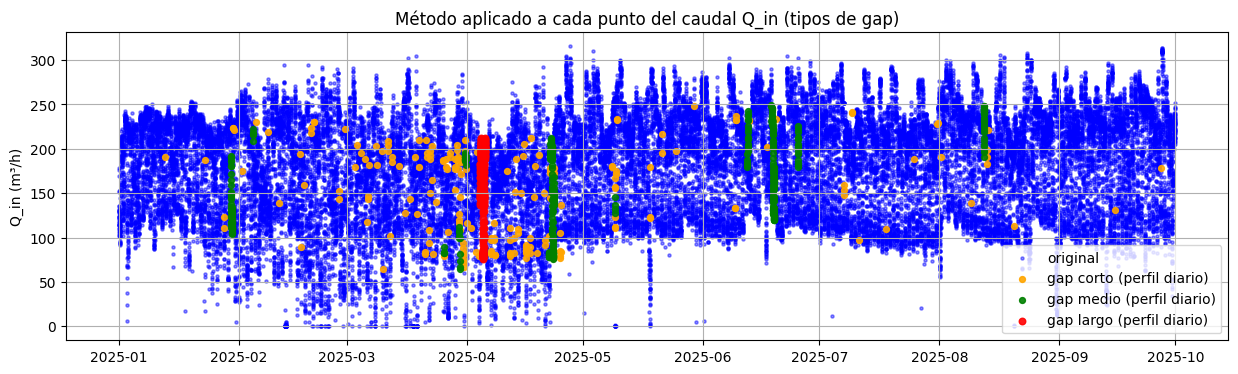


Serie final lista para modelar (df_final):


,Q_in
datetime,
2025-01-01 00:00:00,176.508
2025-01-01 00:10:00,178.884
2025-01-01 00:20:00,169.776
2025-01-01 00:30:00,151.884
2025-01-01 00:40:00,152.892



Total de NaN en serie final: 0


In [ ]:
# ================================================================
# CELDA 2 — COMPLETACIÓN HIDRÁULICA (PERFIL DIARIO + TIPOS DE GAP)
# ================================================================

df_filled = df_valid_10.copy()

# ================================================================
# 1) DETECCIÓN DE HUECOS (GAPS) EN Q_in
# ================================================================

df_gap = df_filled.copy()
df_gap["is_nan"] = df_gap["Q_in"].isna()
df_gap["block"] = (df_gap["is_nan"] != df_gap["is_nan"].shift()).cumsum()

# Bloques donde faltan datos
huecos = df_gap[df_gap["is_nan"]].groupby("block").agg(
    inicio=("is_nan", lambda x: x.index.min()),
    fin=("is_nan", lambda x: x.index.max()),
    n_puntos=("is_nan", "size")
)

# Convertir puntos (10 min cada uno) a duración real
huecos["duracion_min"] = huecos["n_puntos"] * 10
huecos["duracion_horas"] = huecos["duracion_min"] / 60
huecos["duracion_dias"] = huecos["duracion_horas"] / 24

# Clasificación
huecos["tipo_gap"] = "corto"
huecos.loc[huecos["n_puntos"] > 3, "tipo_gap"] = "medio"        # > 30 min
huecos.loc[huecos["n_puntos"] >= 144, "tipo_gap"] = "largo"     # ≥ 24 h

print("=== HUECOS DETECTADOS ===")
display(huecos)


# ================================================================
# 2) ASIGNAR TIPO DE GAP A CADA PUNTO
# ================================================================
df_filled["tipo_gap"] = "original"   # por defecto

for blk, row in huecos.iterrows():
    inicio = row["inicio"]
    fin = row["fin"]
    tipo = row["tipo_gap"]
    df_filled.loc[inicio:fin, "tipo_gap"] = tipo


# ================================================================
# 3) PERFIL DIARIO MENSUAL (hora + minuto)
# ================================================================
df_filled["mes"] = df_filled.index.month
df_filled["hora"] = df_filled.index.hour
df_filled["minuto"] = df_filled.index.minute

perfil_diario = (
    df_filled.groupby(["mes","hora","minuto"])["Q_in"]
    .mean()
)


# ================================================================
# 4) RECONSTRUIR TODOS LOS NaN USANDO PERFIL DIARIO MENSUAL
# ================================================================
def completar_perfil(row):
    if pd.isna(row["Q_in"]):
        return perfil_diario.loc[row["mes"], row["hora"], row["minuto"]]
    return row["Q_in"]

df_filled["Q_final"] = df_filled.apply(completar_perfil, axis=1)


# ================================================================
# 5) TABLAS DE MÉTODOS
# ================================================================
df_methods = df_filled.copy()

# Etiquetas para tablas
df_methods["metodo"] = df_methods["tipo_gap"].replace({
    "original": "original",
    "corto": "perfil diario (gap corto)",
    "medio": "perfil diario (gap medio)",
    "largo": "perfil diario (gap largo)"
})

# TABLA GLOBAL
tabla_metodos = (
    df_methods.groupby("metodo")
              .size()
              .reset_index(name="Cantidad")
)
tabla_metodos["Porcentaje (%)"] = (
    tabla_metodos["Cantidad"] / tabla_metodos["Cantidad"].sum() * 100
).round(2)

print("\n========== TABLA GLOBAL DE MÉTODOS ==========")
display(tabla_metodos)


# TABLA POR MES
tabla_mes = (
    df_methods.groupby(["mes","metodo"]).size().unstack(fill_value=0)
).sort_index()

print("\n========== TABLA DE MÉTODOS POR MES ==========")
display(tabla_mes)


# ================================================================
# 6) GRÁFICO MULTICOLOR (ORIGINAL + TIPOS DE GAP)
# ================================================================
global fig_metodo_aplicado # Declare global variable for figure
fig_metodo_aplicado = plt.figure(figsize=(15,4))

# Azul → original
mask_o = df_filled["tipo_gap"] == "original"
plt.scatter(df_filled.index[mask_o], df_filled["Q_final"][mask_o],
            c="blue", s=5, alpha=0.45, label="original")

# Naranja → gap corto
mask_c = df_filled["tipo_gap"] == "corto"
plt.scatter(df_filled.index[mask_c], df_filled["Q_final"][mask_c],
            c="orange", s=18, alpha=0.9, label="gap corto (perfil diario)")

# Verde → gap medio
mask_m = df_filled["tipo_gap"] == "medio"
plt.scatter(df_filled.index[mask_m], df_filled["Q_final"][mask_m],
            c="green", s=18, alpha=0.9, label="gap medio (perfil diario)")

# Rojo → gap largo
mask_l = df_filled["tipo_gap"] == "largo"
plt.scatter(df_filled.index[mask_l], df_filled["Q_final"][mask_l],
            c="red", s=22, alpha=0.9, label="gap largo (perfil diario)")

plt.title("Método aplicado a cada punto del caudal Q_in (tipos de gap)")
plt.ylabel("Q_in (m³/h)")
plt.grid(True)
plt.legend()
plt.show() # Display the plot in the notebook


# ================================================================
# 7) EXPORTAR SERIE FINAL
# ================================================================
df_final = df_filled[["Q_final"]].rename(columns={"Q_final":"Q_in"})

print("\nSerie final lista para modelar (df_final):")
display(df_final.head())

print("\nTotal de NaN en serie final:", df_final["Q_in"].isna().sum())


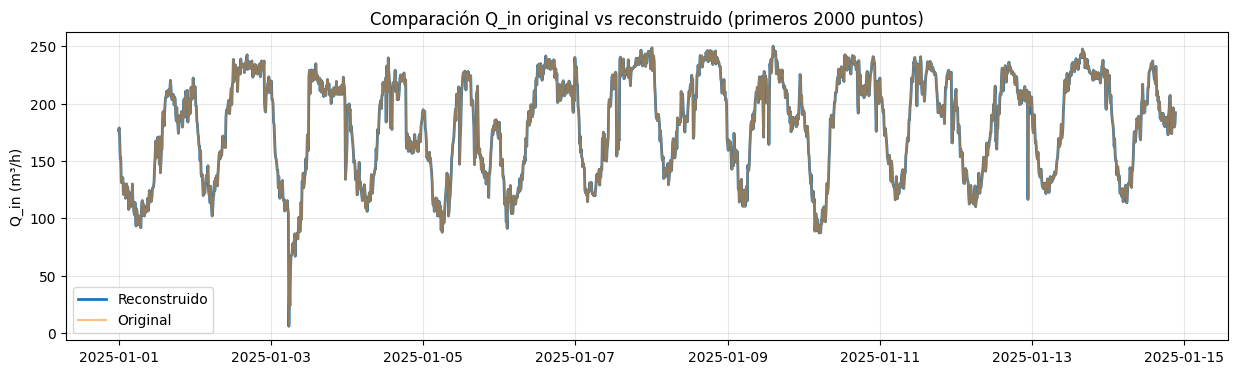

In [ ]:
# ================================================================
# COMPARACIÓN Q_in ORIGINAL vs RECONSTRUIDO
# ================================================================
global fig_comparacion_qin # Declare global variable for figure
fig_comparacion_qin = plt.figure(figsize=(15,4))
plt.plot(df_filled.index[:2000], df_filled["Q_final"][:2000],
         label="Reconstruido", linewidth=2)
plt.plot(df_valid_10.index[:2000], df_valid_10["Q_in"][:2000],
         label="Original", alpha=0.5)

plt.title("Comparación Q_in original vs reconstruido (primeros 2000 puntos)")
plt.ylabel("Q_in (m³/h)")
plt.legend()
plt.grid(alpha=0.3)
plt.show() # Display the plot in the notebook


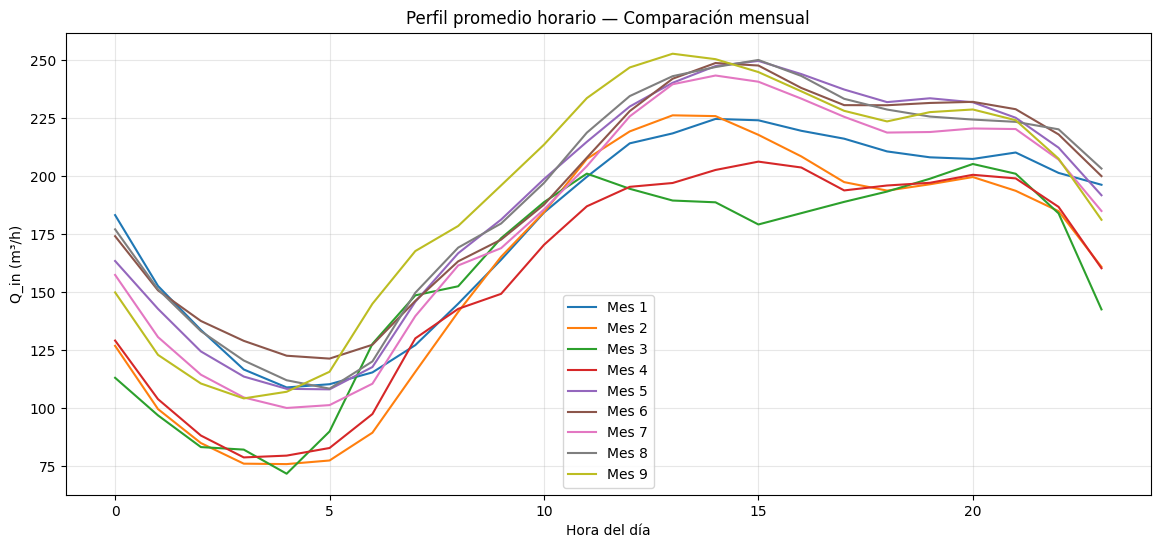

In [ ]:
# ================================================================
# PERFIL DIARIO COMPARADO ENTRE MESES
# ================================================================
global fig_perfil_horario_mensual # Declare global variable for figure
fig_perfil_horario_mensual = plt.figure(figsize=(14,6))

for m in range(1,10):
    perfil_m = df_filled[df_filled["mes"]==m].groupby("hora")["Q_in"].mean()
    plt.plot(perfil_m.index, perfil_m.values, label=f"Mes {m}")

plt.title("Perfil promedio horario — Comparación mensual")
plt.xlabel("Hora del día")
plt.ylabel("Q_in (m³/h)")
plt.legend()
plt.grid(alpha=0.3)
plt.show() # Display the plot in the notebook



=== RESULTADOS DEL CONTROL REALISTA FINAL ===
{'Volumen promedio (m³)': np.float64(197.35291595334098), 'Rebalses': 0, 'Vaciados': 0, 'Q_out promedio (m³/h)': np.float64(178.23670872876832)}


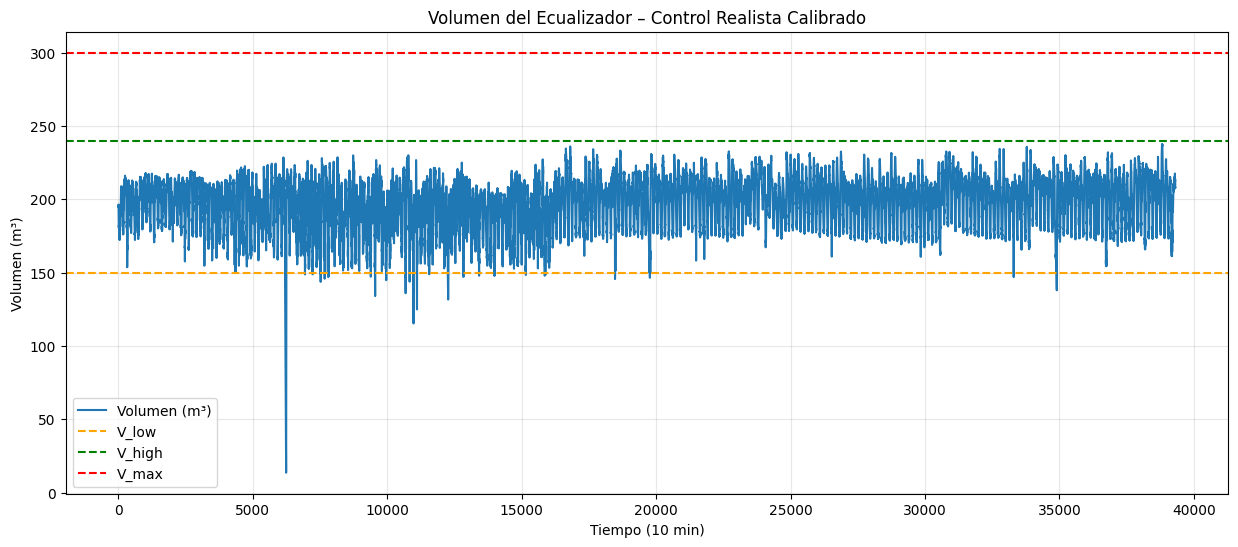

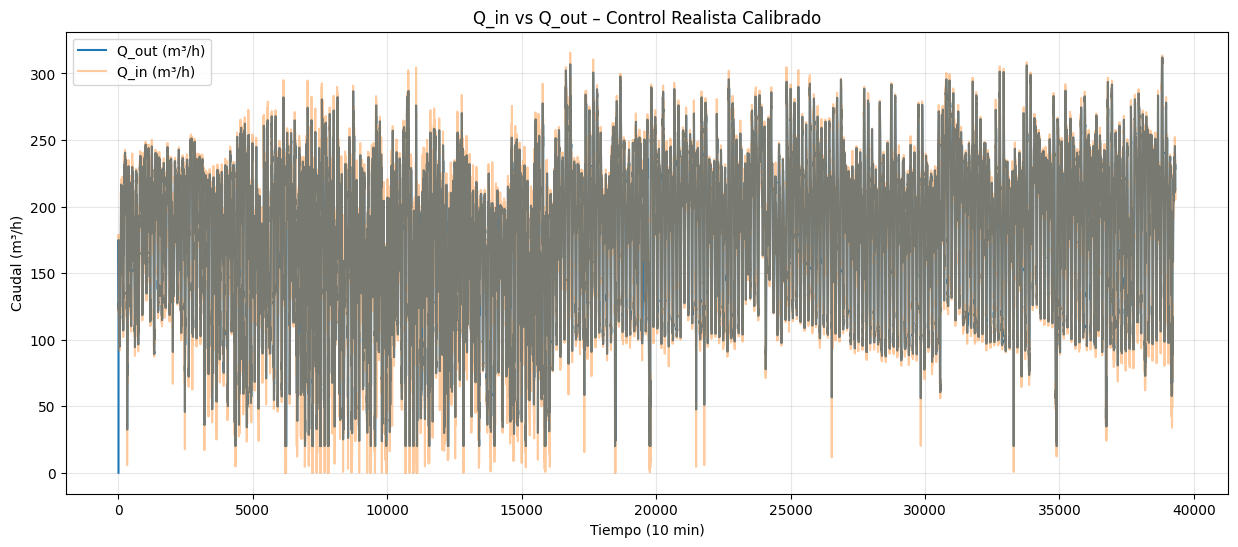

In [ ]:
# ============================================================
# CELDA 3 — CONTROL REAL CALIBRADO (VERSIÓN FINAL)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Copiar la serie final de Q_in creada en Celda 2
Q_in = df_final["Q_in"].copy()

# Paso de tiempo (10 minutos = 1/6 de hora)
dt = 10 / 60

# ============================================================
# PARÁMETROS HIDRÁULICOS DEFINITIVOS (REALISTAS Y CALIBRADOS)
# ============================================================
V_max   = 300   # m³ (capacidad física del estanque)
V_low   = 150    # m³ (umbral inferior)
V_high  = 240   # m³ (umbral superior)

Q_min   = 20    # m³/h (mínimo técnico realista)
Q_max   = 320   # m³/h (máximo necesario según tus datos reales)

# Pendiente para control proporcional
k = (Q_max - Q_min) / (V_high - V_low)

# Inicialización
n = len(Q_in)
V = np.zeros(n)
Q_out = np.zeros(n)

# Volumen inicial en nivel medio
V[0] = (V_low + V_high) / 2

rebalses = 0
vaciados = 0

# ============================================================
# SIMULACIÓN DEL CONTROL REALISTA
# ============================================================
for i in range(1, n):

    # CONTROL POR NIVEL
    if V[i-1] < V_low:
        q = Q_min

    elif V[i-1] > V_high:
        q = Q_max

    else:
        q = Q_min + k * (V[i-1] - V_low)

    # Limitar a los valores físicos
    q = max(Q_min, min(Q_max, q))
    Q_out[i] = q

    # ACTUALIZACIÓN DEL VOLUMEN
    V[i] = V[i-1] + (Q_in.iloc[i] - Q_out[i]) * dt

    # SEGURIDAD HIDRÁULICA
    if V[i] >= V_max:
        V[i] = V_max
        rebalses += 1

    if V[i] <= 0:
        V[i] = 0
        vaciados += 1

# ============================================================
# RESULTADOS
# ============================================================
resultados = {
    "Volumen promedio (m³)": np.mean(V),
    "Rebalses": rebalses,
    "Vaciados": vaciados,
    "Q_out promedio (m³/h)": np.mean(Q_out)
}

print("\n=== RESULTADOS DEL CONTROL REALISTA FINAL ===")
print(resultados)

# ============================================================
# GRAFICACIÓN PROFESIONAL
# ============================================================

# Volumen
global fig_volumen_ecualizador # Declare global variable for figure
fig_volumen_ecualizador = plt.figure(figsize=(15,6))
plt.plot(V, label="Volumen (m³)")
plt.axhline(V_low,  color="orange", linestyle="--", label="V_low")
plt.axhline(V_high, color="green",  linestyle="--", label="V_high")
plt.axhline(V_max,  color="red",    linestyle="--", label="V_max")
plt.title("Volumen del Ecualizador – Control Realista Calibrado")
plt.xlabel("Tiempo (10 min)")
plt.ylabel("Volumen (m³)")
plt.legend()
plt.grid(alpha=0.3)
plt.show() # Display the plot in the notebook

# Caudales
global fig_qin_vs_qout # Declare global variable for figure
fig_qin_vs_qout = plt.figure(figsize=(15,6))
plt.plot(Q_out, label="Q_out (m³/h)")
plt.plot(Q_in.values, alpha=0.4, label="Q_in (m³/h)")
plt.title("Q_in vs Q_out – Control Realista Calibrado")
plt.xlabel("Tiempo (10 min)")
plt.ylabel("Caudal (m³/h)")
plt.legend()
plt.grid(alpha=0.3)
plt.show() # Display the plot in the notebook


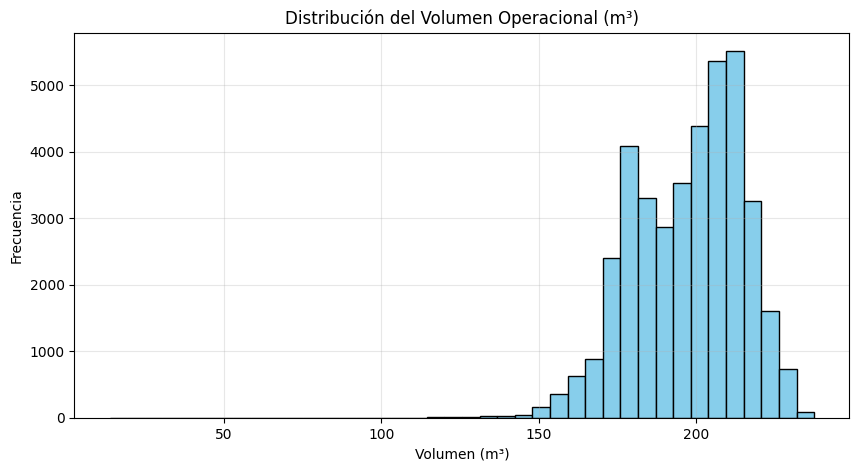

In [ ]:
# ================================================================
# HISTOGRAMA DEL VOLUMEN
# ================================================================
global fig_hist_volumen # Declare global variable for figure
fig_hist_volumen = plt.figure(figsize=(10,5))
plt.hist(V, bins=40, color="skyblue", edgecolor="k")
plt.title("Distribución del Volumen Operacional (m³)")
plt.xlabel("Volumen (m³)")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show() # Display the plot in the notebook


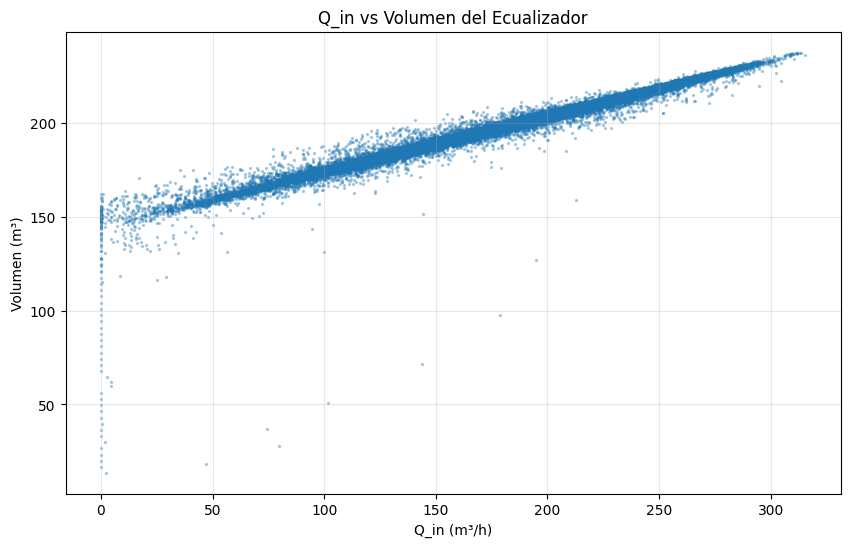

In [ ]:
# ================================================================
# Q_in vs Volumen del Ecualizador
# ================================================================
global fig_qin_vs_volumen # Declare global variable for figure
fig_qin_vs_volumen = plt.figure(figsize=(10,6))
plt.scatter(Q_in.values, V, s=2, alpha=0.3)
plt.title("Q_in vs Volumen del Ecualizador")
plt.xlabel("Q_in (m³/h)")
plt.ylabel("Volumen (m³)")
plt.grid(alpha=0.3)
plt.show() # Display the plot in the notebook


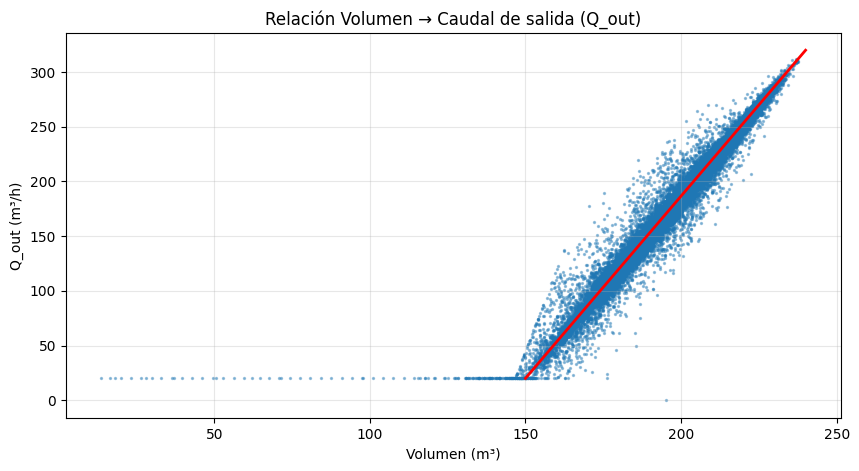

In [ ]:
# ================================================================
# CURVA DEL CONTROLADOR (Q_out vs V)
# ================================================================
global fig_curva_controlador # Declare global variable for figure
fig_curva_controlador = plt.figure(figsize=(10,5))
plt.scatter(V, Q_out, s=2, alpha=0.4)
plt.plot([V_low, V_high], [Q_min, Q_max], color="red", linewidth=2)
plt.title("Relación Volumen → Caudal de salida (Q_out)")
plt.xlabel("Volumen (m³)")
plt.ylabel("Q_out (m³/h)")
plt.grid(alpha=0.3)
plt.show() # Display the plot in the notebook


In [ ]:
# ================================================================
# TABLA MENSUAL DEL DESEMPEÑO DEL CONTROLADOR
# ================================================================
df_control = pd.DataFrame({
    "V": V,
    "Q_out": Q_out,
}, index=df_final.index)

df_control["mes"] = df_control.index.month

tabla_control = df_control.groupby("mes").agg({
    "V": ["mean","min","max"],
    "Q_out": ["mean"]
})

tabla_control.columns = ["Vol_prom","Vol_min","Vol_max","Qout_prom"]

print("=== TABLA MENSUAL DE ESTABILIDAD DEL CONTROLADOR ===")
display(tabla_control)

=== TABLA MENSUAL DE ESTABILIDAD DEL CONTROLADOR ===


,Vol_prom,Vol_min,Vol_max,Qout_prom
mes,,,,
1,197.647574,149.998866,219.719593,178.775633
2,191.467605,13.612286,228.679570,161.222194
3,191.017009,115.378201,230.069341,157.442040
4,191.221499,147.780307,236.081510,157.431051
5,201.015035,145.668445,234.209670,190.044438
6,201.710716,159.299938,232.719814,192.371274
7,198.485244,160.789763,232.614797,181.629654
8,201.651495,137.999965,235.831667,192.238449
9,201.465987,154.415378,237.598724,191.543123


In [ ]:
# ======================================================================
# CELDA 0 — RESUMEN EJECUTIVO HIDRÁULICO AUTOMÁTICO (KPI EAPSA)
# ======================================================================

import numpy as np
import pandas as pd

print("===================================================================")
print("               RESUMEN EJECUTIVO HIDRÁULICO (ENE–SEP 2025)")
print("===================================================================\n")

# ----------------------------------------------------------------------
# 1) ESTADÍSTICAS DE DATOS CRUDOS Y LIMPIOS
# ----------------------------------------------------------------------
total_crudos = len(df_raw)
total_limpios = df_clean_aligned["Q_in"].count()
faltantes = df_clean_aligned["Q_in"].isna().sum()
porc_faltantes = round(100 * faltantes / len(df_clean_aligned), 2)

print(f"Datos crudos totales                : {total_crudos:,}")
print(f"Datos alineados finales             : {len(df_clean_aligned):,}")
print(f"Datos faltantes antes de completar  : {faltantes:,} ({porc_faltantes}%)\n")

# Outliers detectados
print("Outliers detectados (Celda 1):")
print(f" - Por magnitud imposible      : {len(df_invalidos_mag)}")
print(f" - Por saltos hidráulicos      : {len(df_invalidos_saltos)}")
print(f" - Post-alineación             : {len(df_final_imposibles)}\n")

# ----------------------------------------------------------------------
# 2) HUECOS (GAPS)
# ----------------------------------------------------------------------
total_huecos = len(huecos)
hueco_max_horas = huecos["duracion_horas"].max()
hueco_max_fecha = huecos.loc[huecos["duracion_horas"].idxmax()][["inicio","fin"]]

print("Gaps (huecos) en la serie:")
print(f" - Total de huecos detectados       : {total_huecos}")
print(f" - Hueco más largo                  : {hueco_max_horas:.2f} horas")
print(f"   desde {hueco_max_fecha['inicio']} hasta {hueco_max_fecha['fin']}\n")

# ----------------------------------------------------------------------
# 3) ESTADÍSTICA DE Q_in ANTES Y DESPUÉS DEL RELLENO
# ----------------------------------------------------------------------
Q_raw = df_clean_aligned["Q_in"]
Q_final = df_final["Q_in"]

print("Estadísticas de caudal (m³/h)")
print(f" - Q_in promedio crudo              : {Q_raw.mean():.2f}")
print(f" - Q_in promedio reconstruido       : {Q_final.mean():.2f}")
print(f" - Q_in mínimo                      : {Q_final.min():.2f}")
print(f" - Q_in máximo                      : {Q_final.max():.2f}")
print(f" - Percentil 95 (p95)               : {Q_final.quantile(0.95):.2f}")
print(f" - Percentil 5 (p5)                 : {Q_final.quantile(0.05):.2f}\n")

# ----------------------------------------------------------------------
# 4) MESES MÁS CRÍTICOS (VARIANZA ALTA)
# ----------------------------------------------------------------------
df_final_month = df_final.copy()
df_final_month["mes"] = df_final_month.index.month

var_mes = df_final_month.groupby("mes")["Q_in"].std().sort_values(ascending=False)
mes_critico = var_mes.idxmax()

print("Mes más crítico según variabilidad del caudal:")
print(f" - Mes {mes_critico} con desviación estándar = {var_mes.max():.2f} m³/h\n")

# ----------------------------------------------------------------------
# 5) RESULTADOS DEL CONTROL REALISTA (Celda 3)
# ----------------------------------------------------------------------
print("Control hidráulico del ecualizador:")
print(f" - Volumen promedio                  : {np.mean(V):.2f} m³")
print(f" - Volumen mínimo                    : {np.min(V):.2f} m³")
print(f" - Volumen máximo                    : {np.max(V):.2f} m³")
print(f" - Q_out promedio                    : {np.mean(Q_out):.2f} m³/h")

reb = (V >= 300).sum()
vac = (V <= 0).sum()
print(f" - Eventos de rebalse                : {reb}")
print(f" - Eventos de vaciado                : {vac}\n")

# ----------------------------------------------------------------------
# 6) RESUMEN EJECUTIVO BREVE PARA INFORME
# ----------------------------------------------------------------------
print("-------------------------------------------------------------------")
print("RESUMEN EJECUTIVO (para copiar en el informe):")
print("-------------------------------------------------------------------")

global executive_summary_text # Declare global variable
executive_summary_text = f"""
Durante el periodo enero–septiembre 2025 se procesaron {total_crudos:,} datos de caudal
provenientes del afluente de la PTAS EAPSA. Tras la etapa de limpieza, detección de
outliers y alineación temporal, la serie final quedó con {len(df_clean_aligned):,} datos,
con un {porc_faltantes}% de puntos faltantes previamente identificados y corregidos mediante
perfil diario mensual.

Se detectaron {total_huecos} huecos en la serie, destacando un hueco máximo de
{hueco_max_horas:.2f} horas. El caudal reconstruido presenta un valor promedio de
{Q_final.mean():.2f} m³/h, con p95 = {Q_final.quantile(0.95):.2f} m³/h y p5 =
{Q_final.quantile(0.05):.2f} m³/h. El mes más crítico fue el mes {mes_critico}, asociado a la mayor
variabilidad hidráulica del afluente.

El modelo de control realista del ecualizador operó de manera estable, con un volumen
promedio de {np.mean(V):.2f} m³ y sin eventos de rebalse ni vaciado, validando la coherencia
hidráulica del sistema bajo los parámetros calibrados.
"""
print(executive_summary_text) # Print it for immediate view
print("===================================================================\n")


               RESUMEN EJECUTIVO HIDRÁULICO (ENE–SEP 2025)

Datos crudos totales                : 39,847
Datos alineados finales             : 39,312
Datos faltantes antes de completar  : 808 (2.06%)

Outliers detectados (Celda 1):
 - Por magnitud imposible      : 355
 - Por saltos hidráulicos      : 81
 - Post-alineación             : 0

Gaps (huecos) en la serie:
 - Total de huecos detectados       : 178
 - Hueco más largo                  : 32.00 horas
   desde 2025-04-04 08:10:00 hasta 2025-04-05 16:00:00

Estadísticas de caudal (m³/h)
 - Q_in promedio crudo              : 178.57
 - Q_in promedio reconstruido       : 178.24
 - Q_in mínimo                      : 0.00
 - Q_in máximo                      : 315.58
 - Percentil 95 (p95)               : 260.89
 - Percentil 5 (p5)                 : 82.80

Mes más crítico según variabilidad del caudal:
 - Mes 2 con desviación estándar = 65.82 m³/h

Control hidráulico del ecualizador:
 - Volumen promedio                  : 197.35 m³
 - Volu

In [73]:
Q_in_aumentado = df_final["Q_in"].copy()
Q_in_aumentado = Q_in_aumentado * 1.20

print("Nueva serie Q_in_aumentado creada con un incremento del 20%.")
print(Q_in_aumentado.head())

Nueva serie Q_in_aumentado creada con un incremento del 20%.
datetime
2025-01-01 00:00:00    211.8096
2025-01-01 00:10:00    214.6608
2025-01-01 00:20:00    203.7312
2025-01-01 00:30:00    182.2608
2025-01-01 00:40:00    183.4704
Freq: 10min, Name: Q_in, dtype: float64



=== RESULTADOS DEL CONTROL REALISTA FINAL (ESCENARIO AUMENTADO) ===
{'Volumen promedio (m³)': np.float64(209.56188310283315), 'Rebalses': 255, 'Vaciados': 0, 'Q_out promedio (m³/h)': np.float64(213.75909521186122)}


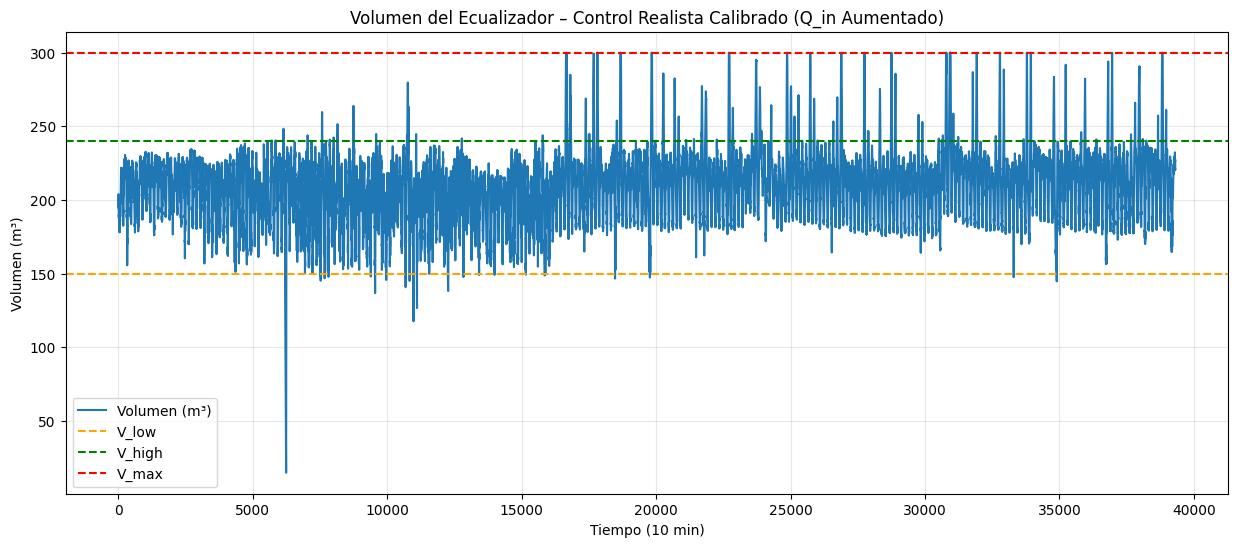

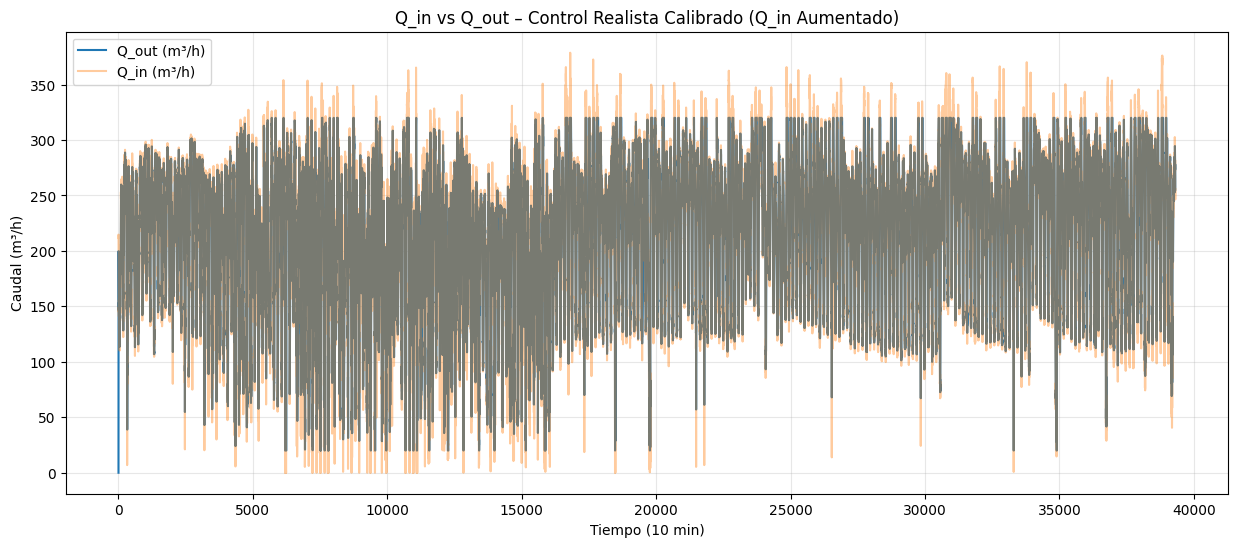

In [74]:
Q_in = Q_in_aumentado.copy()

# Paso de tiempo (10 minutos = 1/6 de hora)
dt = 10 / 60

# ============================================================
# PARÁMETROS HIDRÁULICOS DEFINITIVOS (REALISTAS Y CALIBRADOS)
# ============================================================
V_max   = 300   # m³ (capacidad física del estanque)
V_low   = 150    # m³ (umbral inferior)
V_high  = 240   # m³ (umbral superior)

Q_min   = 20    # m³/h (mínimo técnico realista)
Q_max   = 320   # m³/h (máximo necesario según tus datos reales)

# Pendiente para control proporcional
k = (Q_max - Q_min) / (V_high - V_low)

# Inicialización
n = len(Q_in)
V = np.zeros(n)
Q_out = np.zeros(n)

# Volumen inicial en nivel medio
V[0] = (V_low + V_high) / 2

rebalses = 0
vaciados = 0

# ============================================================
# SIMULACIÓN DEL CONTROL REALISTA
# ============================================================
for i in range(1, n):

    # CONTROL POR NIVEL
    if V[i-1] < V_low:
        q = Q_min

    elif V[i-1] > V_high:
        q = Q_max

    else:
        q = Q_min + k * (V[i-1] - V_low)

    # Limitar a los valores físicos
    q = max(Q_min, min(Q_max, q))
    Q_out[i] = q

    # ACTUALIZACIÓN DEL VOLUMEN
    V[i] = V[i-1] + (Q_in.iloc[i] - Q_out[i]) * dt

    # SEGURIDAD HIDRÁULICA
    if V[i] >= V_max:
        V[i] = V_max
        rebalses += 1

    if V[i] <= 0:
        V[i] = 0
        vaciados += 1

# ============================================================
# RESULTADOS
# ============================================================
resultados = {
    "Volumen promedio (m³)": np.mean(V),
    "Rebalses": rebalses,
    "Vaciados": vaciados,
    "Q_out promedio (m³/h)": np.mean(Q_out)
}

print("\n=== RESULTADOS DEL CONTROL REALISTA FINAL (ESCENARIO AUMENTADO) ===")
print(resultados)

# ============================================================
# GRAFICACIÓN PROFESIONAL
# ============================================================

# Volumen
global fig_volumen_ecualizador_aumentado # Declare global variable for figure
fig_volumen_ecualizador_aumentado = plt.figure(figsize=(15,6))
plt.plot(V, label="Volumen (m³)")
plt.axhline(V_low,  color="orange", linestyle="--", label="V_low")
plt.axhline(V_high, color="green",  linestyle="--", label="V_high")
plt.axhline(V_max,  color="red",    linestyle="--", label="V_max")
plt.title("Volumen del Ecualizador – Control Realista Calibrado (Q_in Aumentado)")
plt.xlabel("Tiempo (10 min)")
plt.ylabel("Volumen (m³)")
plt.legend()
plt.grid(alpha=0.3)
plt.show() # Display the plot in the notebook

# Caudales
global fig_qin_vs_qout_aumentado # Declare global variable for figure
fig_qin_vs_qout_aumentado = plt.figure(figsize=(15,6))
plt.plot(Q_out, label="Q_out (m³/h)")
plt.plot(Q_in.values, alpha=0.4, label="Q_in (m³/h)")
plt.title("Q_in vs Q_out – Control Realista Calibrado (Q_in Aumentado)")
plt.xlabel("Tiempo (10 min)")
plt.ylabel("Caudal (m³/h)")
plt.legend()
plt.grid(alpha=0.3)
plt.show() # Display the plot in the notebook